In [1]:
import pandas as pd

df = pd.read_excel("Indices weed-crop.xlsx", sheet_name="winter")


In [11]:
df.head()       # Shows the first five rows
df.info()       # Gives an overview of columns, data types, and non-null counts
df.describe()   # Provides summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 36 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    379 non-null    object 
 1   RARSa      379 non-null    float64
 2   RARSb      379 non-null    float64
 3   NDVI705    379 non-null    float64
 4   PSSRa      379 non-null    float64
 5   PSSRb      379 non-null    float64
 6   PSNDa      379 non-null    float64
 7   PSNDb      379 non-null    float64
 8   YI         379 non-null    float64
 9   mSR        379 non-null    float64
 10  mNDI       379 non-null    float64
 11  DD         379 non-null    float64
 12  RES        379 non-null    float64
 13  RARSc      379 non-null    float64
 14  SIPI       379 non-null    float64
 15  PSSRc      379 non-null    float64
 16  PRI        379 non-null    float64
 17  CARI       379 non-null    float64
 18  MSI        379 non-null    float64
 19  WI         379 non-null    float64
 20  TM5TM7    

,RARSa,RARSb,NDVI705,PSSRa,PSSRb,PSNDa,PSNDb,YI,mSR,mNDI,...,TBRIa,TBRIb,NDWIa,NDWIb,NDWIc,WABIa,WABIb,WABIc,NDlma,NDMI
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,...,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,0.475614,0.039966,0.374472,6.392439,5.583229,0.718519,0.685717,-0.007426,1.234492,0.519498,...,0.998953,0.958561,0.490985,0.209240,0.491526,0.013977,0.017508,-0.051184,0.104495,-0.000057
std,0.082470,0.013773,0.062744,1.574372,1.264950,0.053351,0.056543,0.003122,0.224603,0.082426,...,0.019323,0.009472,0.056566,0.036069,0.066991,0.110758,0.109409,0.113919,0.023382,0.003981
min,0.260412,0.015435,0.217123,3.620865,3.185210,0.567181,0.522127,-0.016645,0.723277,0.291654,...,0.939928,0.914699,0.329630,0.129609,0.294296,-0.357003,-0.346863,-0.425715,0.054411,-0.010110
25%,0.425816,0.031293,0.331196,5.285447,4.673485,0.681805,0.647479,-0.009366,1.076932,0.460727,...,0.984850,0.954469,0.453057,0.183652,0.447030,-0.046672,-0.042065,-0.115678,0.089296,-0.002877
50%,0.491513,0.036977,0.370542,6.012623,5.411990,0.714800,0.688084,-0.007933,1.222414,0.523931,...,0.996201,0.960242,0.484292,0.206589,0.487788,0.028830,0.029085,-0.040195,0.102615,-0.000161
75%,0.535875,0.046203,0.419705,7.116845,6.346770,0.753599,0.727772,-0.006015,1.369969,0.582075,...,1.014901,0.964913,0.527354,0.230200,0.527923,0.083712,0.088570,0.019819,0.116776,0.002460
max,0.649728,0.167071,0.525403,12.239014,10.427906,0.848931,0.824990,0.005524,1.912162,0.680537,...,1.038022,0.973905,0.687975,0.334639,0.741952,0.309083,0.315830,0.251761,0.190362,0.012492


Accuracy: 0.7631578947368421


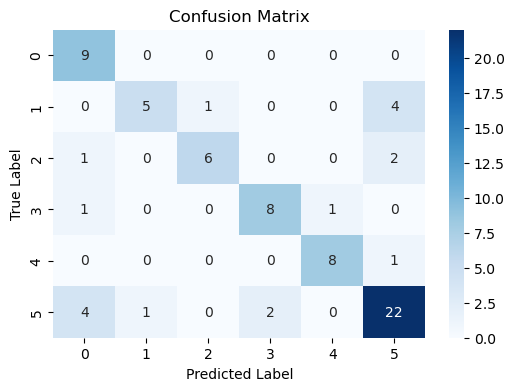

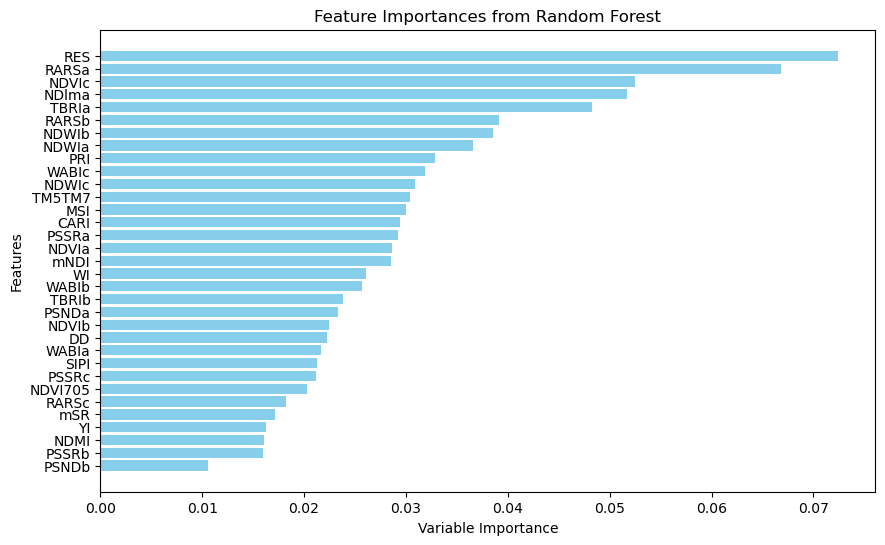

              precision    recall  f1-score   support

       AVEFA       0.60      1.00      0.75         9
      Barley       0.83      0.50      0.62        10
         Oat       0.86      0.67      0.75         9
       PAPRH       0.80      0.80      0.80        10
       POLAV       0.89      0.89      0.89         9
       Wheat       0.76      0.76      0.76        29

    accuracy                           0.76        76
   macro avg       0.79      0.77      0.76        76
weighted avg       0.78      0.76      0.76        76



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'df' is your DataFrame and 'target' is the name of your target column:
X = df.drop("species", axis=1)  # Features
y = df["species"]               # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Variable Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

cm_df

from sklearn.metrics import confusion_matrix, classification_report
# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example lists of species for each category
monocot_species = ["Barley","Wheat","Oat","AVEFA"]  # example species
dicot_species   = ["PAPRO","POLAV"]
weed_species    = ["AVEFA","PAPRO","POLAV"]  # example of some species labeled as weeds
crop_species    = ["Barley","Wheat","Oat"]

# Third-level species groups (adjust these depending on your actual data):
monocot_weed_species = ["AVEFA"]
monocot_crop_species = [ "Barley","Wheat","Oat"]
dicot_weed_species   = ["PAPRO","POLAV"]

# Assume df is your main dataframe with features and species
# Example:
# df = pd.read_csv("your_data.csv")

# Features and target
X = df.select_dtypes(include=[np.number])


# Create first-level category
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
# Create second-level category
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')


y_cat1 = df["category1"]  # Level 1 target 

# Level 1: Monocot vs Dicot
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1)
clf_cat1 = RandomForestClassifier(random_state=42)
clf_cat1.fit(X_train_cat1, y_train_cat1)

y_pred_cat1 = clf_cat1.predict(X_test_cat1)

# Split test data by predicted category1
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

y_test_monocot = df.loc[X_test_monocot.index, 'category2']
y_test_dicot   = df.loc[X_test_dicot.index, 'category2']

# Level 2: Weed vs Crop (for monocot)
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]

X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(X_monocot, y_monocot, test_size=0.2, random_state=42, stratify=y_monocot)
clf_cat2_monocot = RandomForestClassifier(random_state=42)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)

# Level 2: Weed vs Crop (for dicot)
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]

X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot)
clf_cat2_dicot = RandomForestClassifier(random_state=42)
clf_cat2_dicot.fit(X_train_di, y_train_di)

y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)

# Now we have predictions for category1 and category2. Next: species level.

# For the third level, we train separate models for each final group:
# Monocot-Weed, Monocot-Crop, Dicot-Weed, Dicot-Crop.

# Example: Monocot-Weed model (if multiple species in that group)
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]

clf_mono_weed = RandomForestClassifier(random_state=42)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

# Monocot-Crop model
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]

clf_mono_crop = RandomForestClassifier(random_state=42)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

# Dicot-Weed model
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]

clf_dicot_weed = RandomForestClassifier(random_state=42)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)

# Dicot-Crop model
dicot_crop_mask = (df['category1'] == 'dicot') & (df['category2'] == 'crop')
X_dicot_crop = X[dicot_crop_mask]
y_dicot_crop = df['species'][dicot_crop_mask]

clf_dicot_crop = RandomForestClassifier(random_state=42)
clf_dicot_crop.fit(X_dicot_crop, y_dicot_crop)

# instead of unconditionally fitting, do it in one line:
clf_dicot_crop = RandomForestClassifier(random_state=42).fit(
    X_dicot_crop, y_dicot_crop
) if len(y_dicot_crop)>0 else None


# Predict species level on the test set:
# For each test sample, use the predicted category1 and category2 to decide which classifier to use at level 3.

final_species_preds = []

for idx in X_test_cat1.index:
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if cat1_pred == 'monocot':
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]  # use monocot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]  # use dicot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]

    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

# Evaluate accuracy of final species predictions:
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_species,final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_species)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

from sklearn.metrics import confusion_matrix, classification_report
# Generate and print the classification report
report = classification_report(y_test_species, final_species_preds)
print(report)


Final Species-Level Accuracy: 0.9342105263157895
              precision    recall  f1-score   support

       AVEFA       1.00      1.00      1.00         8
      Barley       1.00      1.00      1.00         5
         Oat       1.00      0.91      0.95        11
       PAPRH       0.73      1.00      0.85        11
       POLAV       1.00      0.75      0.86         8
       Wheat       0.97      0.94      0.95        33

    accuracy                           0.93        76
   macro avg       0.95      0.93      0.93        76
weighted avg       0.95      0.93      0.94        76



Accuracy: 0.4186046511627907


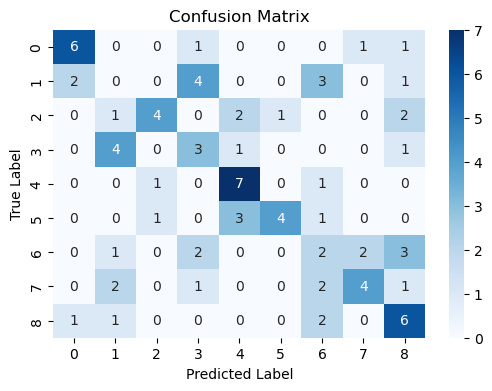

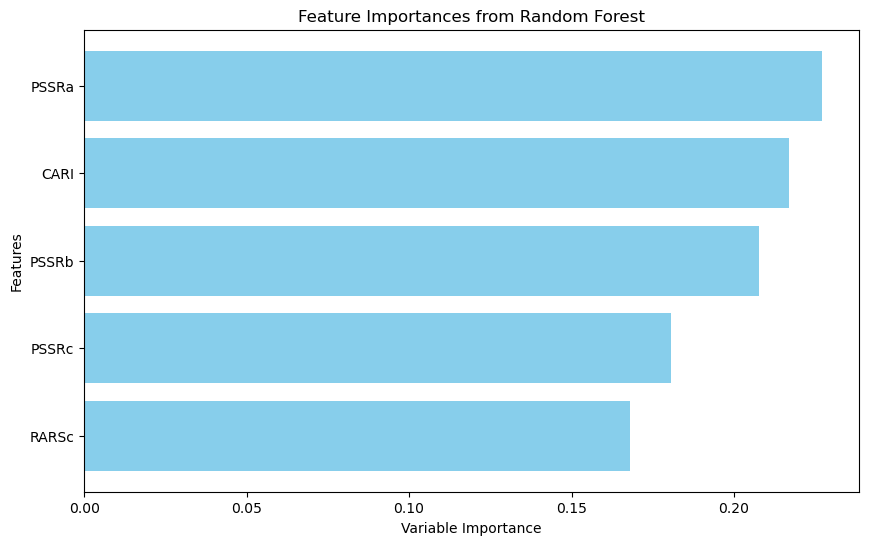

,AVEFA,Barley,ECHCG,Oat,PAPRO,POLAV,Wheat D,Wheat I,Wheat S
AVEFA,66.666667,0.000000,0.000000,11.111111,0.000000,0.000000,0.000000,11.111111,11.111111
Barley,20.000000,0.000000,0.000000,40.000000,0.000000,0.000000,30.000000,0.000000,10.000000
ECHCG,0.000000,10.000000,40.000000,0.000000,20.000000,10.000000,0.000000,0.000000,20.000000
Oat,0.000000,44.444444,0.000000,33.333333,11.111111,0.000000,0.000000,0.000000,11.111111
PAPRO,0.000000,0.000000,11.111111,0.000000,77.777778,0.000000,11.111111,0.000000,0.000000
POLAV,0.000000,0.000000,11.111111,0.000000,33.333333,44.444444,11.111111,0.000000,0.000000
Wheat D,0.000000,10.000000,0.000000,20.000000,0.000000,0.000000,20.000000,20.000000,30.000000
Wheat I,0.000000,20.000000,0.000000,10.000000,0.000000,0.000000,20.000000,40.000000,10.000000
Wheat S,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,60.000000


In [7]:
# Assuming 'df' is your DataFrame and 'target' is the name of your target column:
X = df[["PSSRa","PSSRb","RARSc","PSSRc","CARI"]]  # Features
y = df["species"]               # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Variable Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

cm_df

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example lists of species for each category
monocot_species = ["Barley","Wheat D","Wheat I","Wheat S","Oat","AVEFA","ECHCG"]  # example species
dicot_species   = ["PAPRO","POLAV"]
weed_species    = ["AVEFA","PAPRO","POLAV"]  # example of some species labeled as weeds
crop_species    = ["Barley","Wheat D","Wheat I","Wheat S","Oat"]

# Third-level species groups (adjust these depending on your actual data):
monocot_weed_species = ["AVEFA","ECHCG"]
monocot_crop_species = [ "Barley","Wheat D","Wheat I","Wheat S","Oat"]
dicot_weed_species   = ["PAPRO","POLAV"]

# Assume df is your main dataframe with features and species
# Example:
# df = pd.read_csv("your_data.csv")

# Create first-level category
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
# Create second-level category
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

print(df[['category1', 'category2']].value_counts())

category1  category2
monocot    crop         288
dicot      weed          93
monocot    weed          47
Name: count, dtype: int64


In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example lists of species for each category
monocot_species = ["Barley","Wheat","Oat","AVEFA"]  # example species
dicot_species   = ["PAPRO","POLAV"]
weed_species    = ["AVEFA","PAPRO","POLAV"]  # example of some species labeled as weeds
crop_species    = ["Barley","Wheat","Oat"]

# Third-level species groups (adjust these depending on your actual data):
monocot_weed_species = ["AVEFA"]
monocot_crop_species = [ "Barley","Wheat","Oat"]
dicot_weed_species   = ["PAPRO","POLAV"]

# Assume df is your main dataframe with features and species
# Example:
# df = pd.read_csv("your_data.csv")

# Create first-level category
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
# Create second-level category
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

# Features and target
X = df[["PSSRa", "PSSRb", "RARSc", "PSSRc", "CARI"]]
y_cat1 = df["category1"]  # Level 1 target

# Level 1: Monocot vs Dicot
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1)
clf_cat1 = RandomForestClassifier(random_state=42)
clf_cat1.fit(X_train_cat1, y_train_cat1)

y_pred_cat1 = clf_cat1.predict(X_test_cat1)

# Split test data by predicted category1
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

y_test_monocot = df.loc[X_test_monocot.index, 'category2']
y_test_dicot   = df.loc[X_test_dicot.index, 'category2']

# Level 2: Weed vs Crop (for monocot)
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]

X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(X_monocot, y_monocot, test_size=0.2, random_state=42, stratify=y_monocot)
clf_cat2_monocot = RandomForestClassifier(random_state=42)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)

# Level 2: Weed vs Crop (for dicot)
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]

X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot)
clf_cat2_dicot = RandomForestClassifier(random_state=42)
clf_cat2_dicot.fit(X_train_di, y_train_di)

y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)

# Now we have predictions for category1 and category2. Next: species level.

# For the third level, we train separate models for each final group:
# Monocot-Weed, Monocot-Crop, Dicot-Weed, Dicot-Crop.

# Example: Monocot-Weed model (if multiple species in that group)
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]

clf_mono_weed = RandomForestClassifier(random_state=42)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

# Monocot-Crop model
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]

clf_mono_crop = RandomForestClassifier(random_state=42)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

# Dicot-Weed model
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]

clf_dicot_weed = RandomForestClassifier(random_state=42)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)


# Predict species level on the test set:
# For each test sample, use the predicted category1 and category2 to decide which classifier to use at level 3.

final_species_preds = []

for idx in X_test_cat1.index:
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if cat1_pred == 'monocot':
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]  # use monocot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]  # use dicot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]

    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

# Evaluate accuracy of final species predictions:
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_species,final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_species)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

from sklearn.metrics import confusion_matrix, classification_report
# Generate and print the classification report
report = classification_report(y_test_species, final_species_preds)
print(report)

NameError: name 'clf_dicot_crop' is not defined

In [ ]:
class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)[source]
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

Read more in the User Guide.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Accuracy: 0.4186046511627907
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best CV Score: 0.41830369357045144


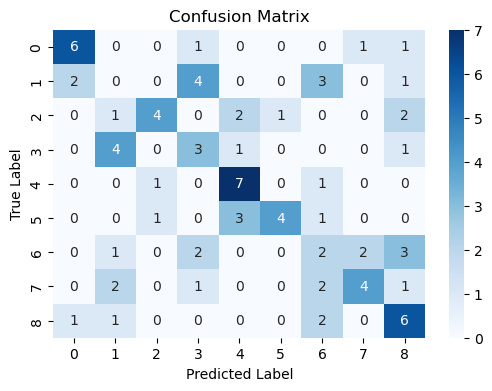

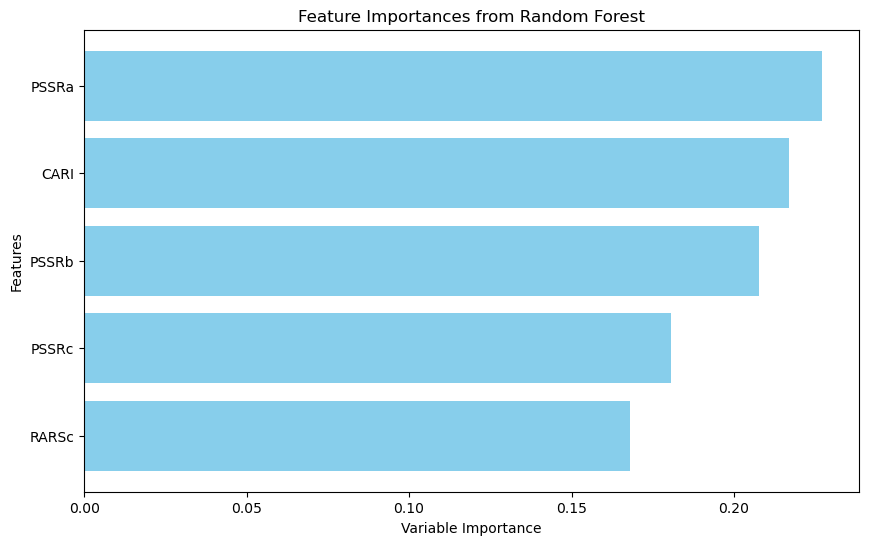

              precision    recall  f1-score   support

       AVEFA       0.67      0.67      0.67         9
      Barley       0.00      0.00      0.00        10
       ECHCG       0.67      0.40      0.50        10
         Oat       0.27      0.33      0.30         9
       PAPRO       0.54      0.78      0.64         9
       POLAV       0.80      0.44      0.57         9
     Wheat D       0.18      0.20      0.19        10
     Wheat I       0.57      0.40      0.47        10
     Wheat S       0.40      0.60      0.48        10

    accuracy                           0.42        86
   macro avg       0.46      0.42      0.42        86
weighted avg       0.45      0.42      0.42        86



In [15]:
# Assuming 'df' is your DataFrame and 'target' is the name of your target column:
X = df[["PSSRa","PSSRb","RARSc","PSSRc","CARI"]]  # Features
y = df["species"]               # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

# Initialize and train the random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#gridsearch
from sklearn.model_selection import GridSearchCV
# Define a dictionary with the hyperparameters you wish to tune:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X, y)


# Print out the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Variable Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

cm_df


from sklearn.metrics import classification_report

# Use your final model to predict on X_test (or your appropriate test data)
final_species_preds = rf.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)

In [17]:
# Print out the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)
# Option 1: Use the best estimator from GridSearchCV
final_model = grid_search.best_estimator_

# Now you can use final_model to predict on new data:
predictions = final_model.predict(X_test)

from sklearn.metrics import classification_report

# Use your final model to predict on X_test (or your appropriate test data)
final_species_preds = final_model.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test_species, final_species_preds)
print(report)

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best CV Score: 0.41830369357045144
              precision    recall  f1-score   support

       AVEFA       0.00      0.00      0.00         9
      Barley       0.00      0.00      0.00         7
       ECHCG       0.00      0.00      0.00         8
         Oat       0.22      0.18      0.20        11
       PAPRO       0.33      0.27      0.30        11
       POLAV       0.00      0.00      0.00         8
     Wheat D       0.40      0.22      0.29        18
     Wheat I       0.10      0.11      0.11         9
     Wheat S       0.00      0.00      0.00         5

    accuracy                           0.12        86
   macro avg       0.12      0.09      0.10        86
weighted avg       0.17      0.12      0.13        86



In [35]:
#set up of the groups
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example lists of species for each category
monocot_species = ["Barley","Wheat D","Wheat I","Wheat S","Oat","AVEFA","ECHCG"]  # example species
dicot_species   = ["PAPRO","POLAV"]
weed_species    = ["AVEFA","PAPRO","POLAV","ECHCG"]  # example of some species labeled as weeds
crop_species    = ["Barley","Wheat D","Wheat I","Wheat S","Oat"]

# Third-level species groups (adjust these depending on your actual data):
monocot_weed_species = ["AVEFA","ECHCG"]
monocot_crop_species = [ "Barley","Wheat D","Wheat I","Wheat S","Oat"]
dicot_weed_species   = ["PAPRO","POLAV"]

# Assume df is your main dataframe with features and species
# Example:
# df = pd.read_csv("your_data.csv")

# Create first-level category
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
# Create second-level category
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

# Features and target
X = df[["PSSRa", "PSSRb", "RARSc", "PSSRc", "CARI"]]
y_cat1 = df["category1"]  # Level 1 target

# Level 1: Monocot vs Dicot
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1)
clf_cat1 = RandomForestClassifier(random_state=42)
clf_cat1.fit(X_train_cat1, y_train_cat1)

y_pred_cat1 = clf_cat1.predict(X_test_cat1)

# Evaluate the model
accuracy = clf_cat1.score(X_test_cat1, y_test_cat1)
print("Accuracy:", accuracy)

#gridsearch level 1
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#gridsearch
from sklearn.model_selection import GridSearchCV
# Define a dictionary with the hyperparameters you wish to tune:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=clf_cat1,param_grid=param_grid)
grid_search.fit(X, y)
# Option 1: Use the best estimator from GridSearchCV
final_model = grid_search.best_estimator_

# Now you can use final_model to predict on new data:
predictions = final_model.predict(X_test_cat1)

# Print out the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Accuracy: 0.872093023255814
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best CV Score: 0.41830369357045144


In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

USE optimal parameters Cat1

In [21]:
clf_cat1 = RandomForestClassifier(random_state=42, 
                                  max_depth=10,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=200)
clf_cat1.fit(X_train_cat1, y_train_cat1)

y_pred_cat1 = clf_cat1.predict(X_test_cat1)
# Generate and print the classification report
report = classification_report(y_test_cat1, y_pred_cat1)
print(report)
# Split test data by predicted category1
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

y_test_monocot = df.loc[X_test_monocot.index, 'category2']
y_test_dicot   = df.loc[X_test_dicot.index, 'category2']


              precision    recall  f1-score   support

       dicot       0.76      0.68      0.72        19
     monocot       0.91      0.94      0.93        67

    accuracy                           0.88        86
   macro avg       0.84      0.81      0.82        86
weighted avg       0.88      0.88      0.88        86



Level 2

In [25]:
# Level 2: Weed vs Crop (for monocot)
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]

X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(X_monocot, y_monocot, test_size=0.2, random_state=42, stratify=y_monocot)
clf_cat2_monocot = RandomForestClassifier(random_state=42)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)

# Level 2: Weed vs Crop (for dicot)
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]

X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot)
clf_cat2_dicot = RandomForestClassifier(random_state=42)
clf_cat2_dicot.fit(X_train_di, y_train_di)

y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)



In [29]:
#gridsearch
from sklearn.model_selection import GridSearchCV
# Define a dictionary with the hyperparameters you wish to tune:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=clf_cat2_monocot,param_grid=param_grid)
grid_search.fit(X_train_mono, y_train_mono)
# Option 1: Use the best estimator from GridSearchCV
final_model = grid_search.best_estimator_

# Now you can use final_model to predict on new data:
predictions = final_model.predict(X)

# Print out the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


from sklearn.metrics import classification_report

# Use your final model to predict on X_test (or your appropriate test data)
final_species_preds = final_model.predict(X)

# Generate and print the classification report
report = classification_report(y_test_species, final_species_preds)
print(report)

C:\Users\benna\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best CV Score: 0.41830369357045144


ValueError: Found input variables with inconsistent numbers of samples: [86, 428]

In [ ]:
#gridsearch
from sklearn.model_selection import GridSearchCV
# Define a dictionary with the hyperparameters you wish to tune:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=clf_cat2_dicot,param_grid=param_grid)
grid_search.fit(X_train_di, y_train_di)
# Option 1: Use the best estimator from GridSearchCV
final_model = grid_search.best_estimator_

# Now you can use final_model to predict on new data:
predictions = final_model.predict(X_test_cat2)

# Print out the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


from sklearn.metrics import classification_report

# Use your final model to predict on X_test (or your appropriate test data)
final_species_preds = final_model.predict(X_test_cat2)

# Generate and print the classification report
report = classification_report(y_test_species, final_species_preds)
print(report)

In [ ]:
clf_cat2_monocot = RandomForestClassifier(random_state=42)

In [ ]:
clf_cat2_dicot = RandomForestClassifier(random_state=42)

APPLY Optimal parameter

In [ ]:
# Level 2: Weed vs Crop (for dicot)
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]

X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot)
clf_cat2_dicot = RandomForestClassifier(random_state=42, 
                                  max_depth=10,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=200)
clf_cat2_dicot.fit(X_train_di, y_train_di)

y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)

optimize monocot weed

In [ ]:
# Example: Monocot-Weed model (if multiple species in that group)
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]

clf_mono_weed = RandomForestClassifier(random_state=42)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

#gridsearch
from sklearn.model_selection import GridSearchCV
# Define a dictionary with the hyperparameters you wish to tune:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=clf_mono_weed,param_grid=param_grid)
grid_search.fit(X_mono_weed, y_mono_weed)
# Option 1: Use the best estimator from GridSearchCV
final_model = grid_search.best_estimator_

# Now you can use final_model to predict on new data:
predictions = final_model.predict(X_mono_weed)

# Print out the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


from sklearn.metrics import classification_report

# Use your final model to predict on X_test (or your appropriate test data)
final_species_preds = final_model.predict(X_test_cat2)

# Generate and print the classification report
report = classification_report(y_test_species, final_species_preds)
print(report)

optimize monocot crop

In [ ]:
# Monocot-Crop model
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]

clf_mono_crop = RandomForestClassifier(random_state=42)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

#gridsearch
from sklearn.model_selection import GridSearchCV
# Define a dictionary with the hyperparameters you wish to tune:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=clf_cat2,param_grid=param_grid)
grid_search.fit(X, y)
# Option 1: Use the best estimator from GridSearchCV
final_model = grid_search.best_estimator_

# Now you can use final_model to predict on new data:
predictions = final_model.predict(X_mono_crop)

# Print out the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


from sklearn.metrics import classification_report

# Use your final model to predict on X_test (or your appropriate test data)
final_species_preds = final_model.predict(X_mono_crop)

# Generate and print the classification report
report = classification_report(y_test_species, final_species_preds)
print(report)

optimize dicot weed

In [ ]:
# Dicot-Weed model
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]

clf_dicot_weed = RandomForestClassifier(random_state=42)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)


optimize dicot crop - when we have it

In [ ]:
# Dicot-Crop model
##dicot_crop_mask = (df['category1'] == 'dicot') & (df['category2'] == 'crop')
#X_dicot_crop = X[dicot_crop_mask]
#y_dicot_crop = df['species'][dicot_crop_mask]

#clf_dicot_crop = RandomForestClassifier(random_state=42)
#clf_dicot_crop.fit(X_dicot_crop, y_dicot_crop)

Ultimate classification

In [ ]:
final_species_preds = []

for idx in X_test_cat1.index:
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if cat1_pred == 'monocot':
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]  # use monocot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]  # use dicot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]

    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

# Evaluate accuracy of final species predictions:
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_species,final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_species)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df


In [ ]:
# Predict species level on the test set:
# For each test sample, use the predicted category1 and category2 to decide which classifier to use at level 3.

final_species_preds = []

for idx in X_test_cat1.index:
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if cat1_pred == 'monocot':
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]  # use monocot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]  # use dicot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]

    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

# Evaluate accuracy of final species predictions:
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_species,final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_species)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

